> **Topic:** Introduction to Neural Network using PyTorch
>
> **Module:** Data Preprocessing, Data Loader and Batching
>
> **Presentor:** Industry Sandbox and AI Computing (ISAIC)
>
> **Date:** 

## What is data preprocessing?

**Issues with analysing raw data:**

Raw data in the datasets can be difficult to analyse when used as input for machine learning models. Few of the major reasons are:
- There are missing values in the samples (e.g. some example data contains `null` values)
- Format of the raw data is not supported by the model libraries (e.g. data is in PIL format, where pytorch model only supports pytorch tensors)
- Range of values in features are significantly different from each other (e.g. one feature is in the range -100 to 100, where as some other feature takes the values in the range `0-1e5`) leading to skewed parameter space

Parametric Space for Raw Data (not scaled)             |  Parametric Space fo Properly Scaled Data
:-------------------------:|:-------------------------:
<img src=img/p1.png alt="Drawing" style="width: 300px;"/>  |  <img src=img/p2.png alt="Drawing" style="width: 300px;"/>

**Data preprocessing** is therefore, an important and necessary step to manipulate data to prepare it for using as input in the machine learning models. Based on the dataset we are dealing with, preprocessing might include removing samples with `null` values, changing the format, scaling the features etc.

In [1]:
#start with loading the required modules
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms

#import numpy module
import numpy as np

#import plotting modules
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', dpi=350)
%matplotlib inline


## Some basic data preprocessing methods in PyTorch

`torchvision.transforms` contains useful basic functions to transform image datasets. If we need to apply multiple transformations to our raw data, they can be chanined together using `Compose` that let us stack multiple transform functions that are applied in sequence and returns the processed dataset ready to use as model input.

Let's compare a single dataset with different transformations applied. For this, we will use the `CIFAR10` dataset.

In [4]:
#load standard 3 channel raw rgb image data (converted to tensors)
train_data_rgb = datasets.CIFAR10(
                root='CIFAR10',
                train=True,
                download=False,
                transform=transforms.ToTensor())

#before loading, transform the rgb image into greyscale first
pre_processing = transforms.Compose(
                [transforms.Grayscale(num_output_channels=1),
                transforms.ToTensor()])

train_data_grey = datasets.CIFAR10(
                    root='CIFAR10',
                    train = True,
                    download = False,
                    transform = pre_processing)


#after transforming the images into greyscale, normalize them based on
#given mean and standard deviation value
pre_processing = transforms.Compose(
                [transforms.Grayscale(num_output_channels=1),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5])])

train_data_greynorm = datasets.CIFAR10(
                        root='CIFAR10',
                        train = True,
                        download = False,
                        transform = pre_processing)


To compare different transformations, let's take the first example in the dataset and plot the histogram of pixel intensity values. For the first dataset, we have pixel intensity in 3 different channels (i.e. R,G, and B).

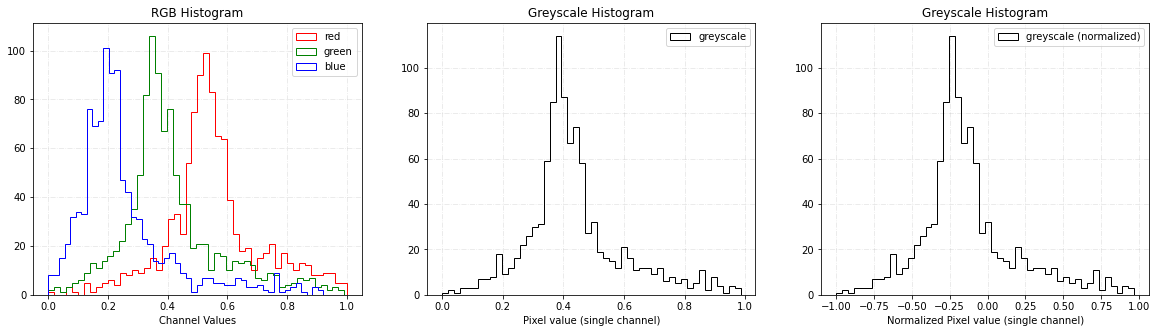

In [6]:
#plot the histogram of the first example in the dataset and compare the differences

#plot the histogram for the raw rgb dataset
rgb_data = train_data_rgb[0][0].view(3, 32*32, 1).squeeze()
grey_data = train_data_grey[0][0].view(1, 32*32, 1).squeeze()
greynorm_data = train_data_greynorm[0][0].view(1, 32*32, 1).squeeze()

fig = plt.figure(figsize=(20,5))
nbins=50
fig.add_subplot(1,3,1)
plt.hist(rgb_data[0].numpy(), bins=nbins, histtype='step', color='r', label='red')
plt.hist(rgb_data[1].numpy(), bins=nbins, histtype='step', color='g', label='green')
plt.hist(rgb_data[2].numpy(), bins=nbins, histtype='step', color='b', label='blue')
plt.title('RGB Histogram')
plt.xlabel('Channel Values')
plt.grid(alpha=0.3, ls='-.')
plt.legend()

#plot the histogram for greyscale transformed dataset
fig.add_subplot(1,3,2)
plt.hist(grey_data.numpy(), bins=nbins, histtype='step', color='k', label='greyscale')
plt.title('Greyscale Histogram')
plt.xlabel('Pixel value (single channel)')
plt.legend()
plt.grid(alpha=0.3, ls='-.')

#plot the histogram for the transformations with both greyscale and normlization
fig.add_subplot(1,3,3)
plt.hist(greynorm_data.numpy(), bins=nbins, histtype='step', color='k', label='greyscale (normalized)')
plt.title('Greyscale Histogram')
plt.xlabel('Normalized Pixel value (single channel)')
plt.legend()
plt.grid(alpha=0.3, ls='-.')


## Data Loader and Batching

Number of parameters in neural network can increase rapidly as the model gets more complicated. We, therefore, need a large amount of data for training neural networks to avoid issues such as overfitting. 

However, the use of large amount of data introduces another hurdle: the size of the data becomes too large to fit in the computation memory at once for model parameter optimization.

To overcome the problem, the method of **stochastic gradient descent (SGD)** is used where we can optimize the model parameters iteratively by only using a subset of the entire dataset at a time.

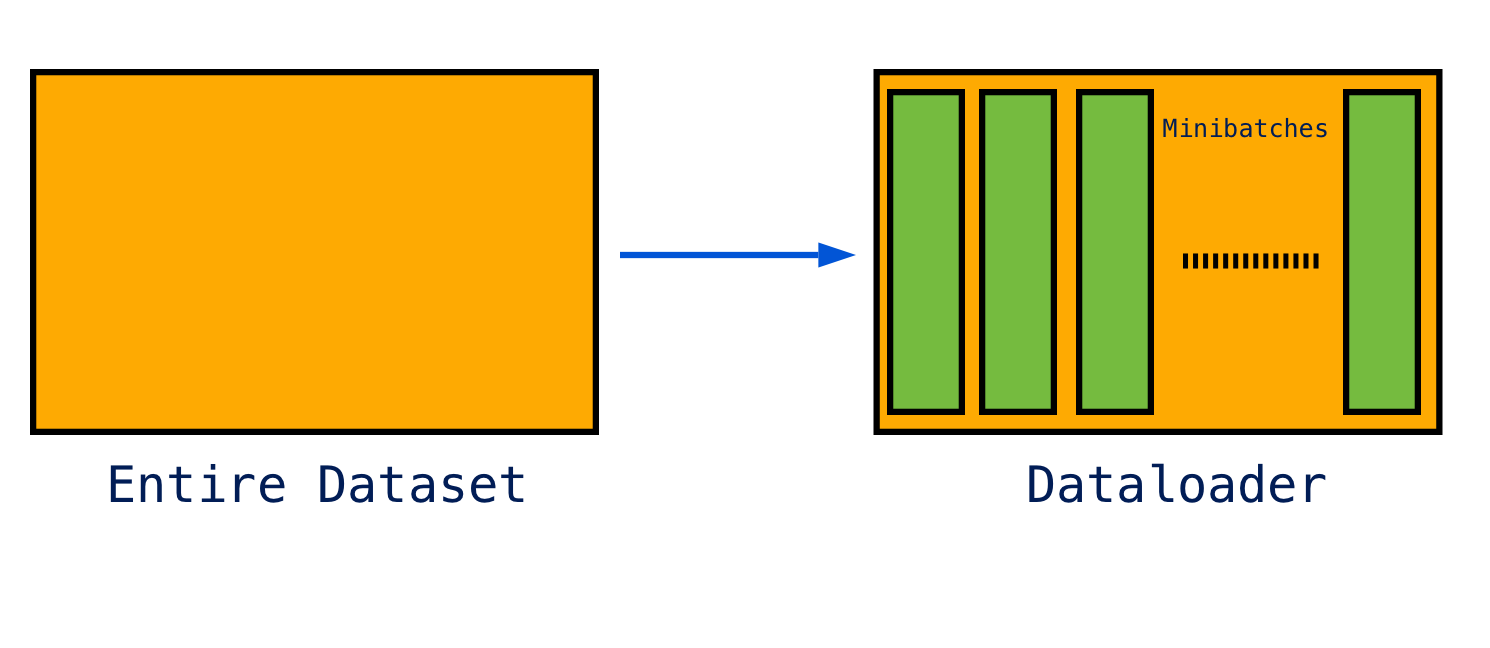

PyTorch `DataLoader` class helps us splitting the dataset into mini-batches to be used during model training. The basic attributes for the class is the following:

```
CLASS torch.utils.data.DataLoader(dataset, batch_size = 1(default), shuffle = False (default))
```

- `dataset` takes the entire dataset as first attribute
- `batch_size` specifies the number of samples to include in each mini-batches
- `shuffle` specifies whether to randomly shuffle the data before splitting into mini-batches

In [12]:
# Load the dataset
pre_processing = transforms.Compose(
                [transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5])])

train_data = datasets.FashionMNIST(
                    root='FMNIST',
                    train=True,
                    download=False,
                    transform=pre_processing)
test_data  = datasets.FashionMNIST(
                    root='FMNIST',
                    train=False,
                    download=False,
                    transform=pre_processing)

#necessary module for batching
from torch.utils.data import DataLoader

#use data loader to iterate over mini-batches
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_data,  batch_size=32, shuffle=True)

#check the loader object
print (type(train_loader))
#check the length pf the loader object
print (len(train_loader))

for idx, data in enumerate(train_loader):
    print (f'This batch indexing (for first batch): {idx}')
    print (f'Let\'s print the first iterable item: {data}')
    print (f'Length of each iterable dataloader object is: {len(data[0])}')
    break #prevent printing for the entire dataset

<class 'torch.utils.data.dataloader.DataLoader'>
1875
This batch indexing (for first batch): 0
Let's print the first iterable item: [tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]

Few keypoints from the above observation:

- length of the dataloader object is `ceil(sample size / batch size)`
- each iterable object can be indexed and is a list of two tensors: first tensor contains the `batch_size` number of samples in an additional dimension and second tensor contains the corresponding labels for those samples